In [2]:
import torch
import numpy as np
import matplotlib.pyplot as plt
from torchvision import datasets, transforms
from torch.utils.data import DataLoader, Dataset
from pathlib import Path
from PIL import Image
import os
import sys

sys.path.append(str(Path("delete.ipynb").resolve().parent.parent))

In [ ]:
from cav_models import MultiPatternCAV, PatternCAV

model1 = torch.load("../results/diffae/dir_models/pattern_cav:alpha0.0.pt", map_location="cpu", weights_only=False)
model2 = torch.load("../results/diffae/dir_models/pattern_cav:alpha10.0.pt", map_location="cpu", weights_only=False)
model3 = torch.load("../results/diffae/dir_models/pattern_cav:alpha0.1.pt", map_location="cpu", weights_only=False)
model4 = torch.load("../results/diffae/dir_models/pattern_cav:alpha1.0.pt", map_location="cpu", weights_only=False)
model5 = torch.load("../results/diffae/dir_models/pattern_cav:alpha0.01.pt", map_location="cpu", weights_only=False)
cavs1 = model1.weights
cavs2 = model2.weights
cavs3 = model3.weights
cavs4 = model4.weights
cavs5 = model5.weights

print(f"cavs1 norm: {torch.norm(cavs1, dim=1)}")
print(f"cavs2 norm: {torch.norm(cavs2, dim=1)}")
print(f"cavs3 norm: {torch.norm(cavs3, dim=1)}")
print(f"cavs4 norm: {torch.norm(cavs4, dim=1)}")
print(f"cavs5 norm: {torch.norm(cavs5, dim=1)}")

cavs1.shape, cavs2.shape

cavs1 norm: tensor([0.2810, 0.2227, 0.2885, 0.1681, 0.4855, 0.3247, 0.1473, 0.1910, 0.3522,
        0.5296, 0.5024, 0.1979, 0.2297, 0.2699, 0.2829, 0.2797, 0.2327, 0.5403,
        0.3106, 0.2172, 0.3620, 0.1544, 0.2451, 0.0922, 0.2433, 0.1370, 0.4470,
        0.1392, 0.3123, 0.3025, 0.2180, 0.2283, 0.1590, 0.2425, 0.1966, 0.5797,
        0.3386, 0.2132, 0.4087, 0.2915], grad_fn=<LinalgVectorNormBackward0>)
cavs2 norm: tensor([1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
        1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
        1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
        1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
        1.0000, 1.0000, 1.0000, 1.0000], grad_fn=<LinalgVectorNormBackward0>)
cavs3 norm: tensor([1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
        1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
        

(torch.Size([40, 512]), torch.Size([40, 512]))

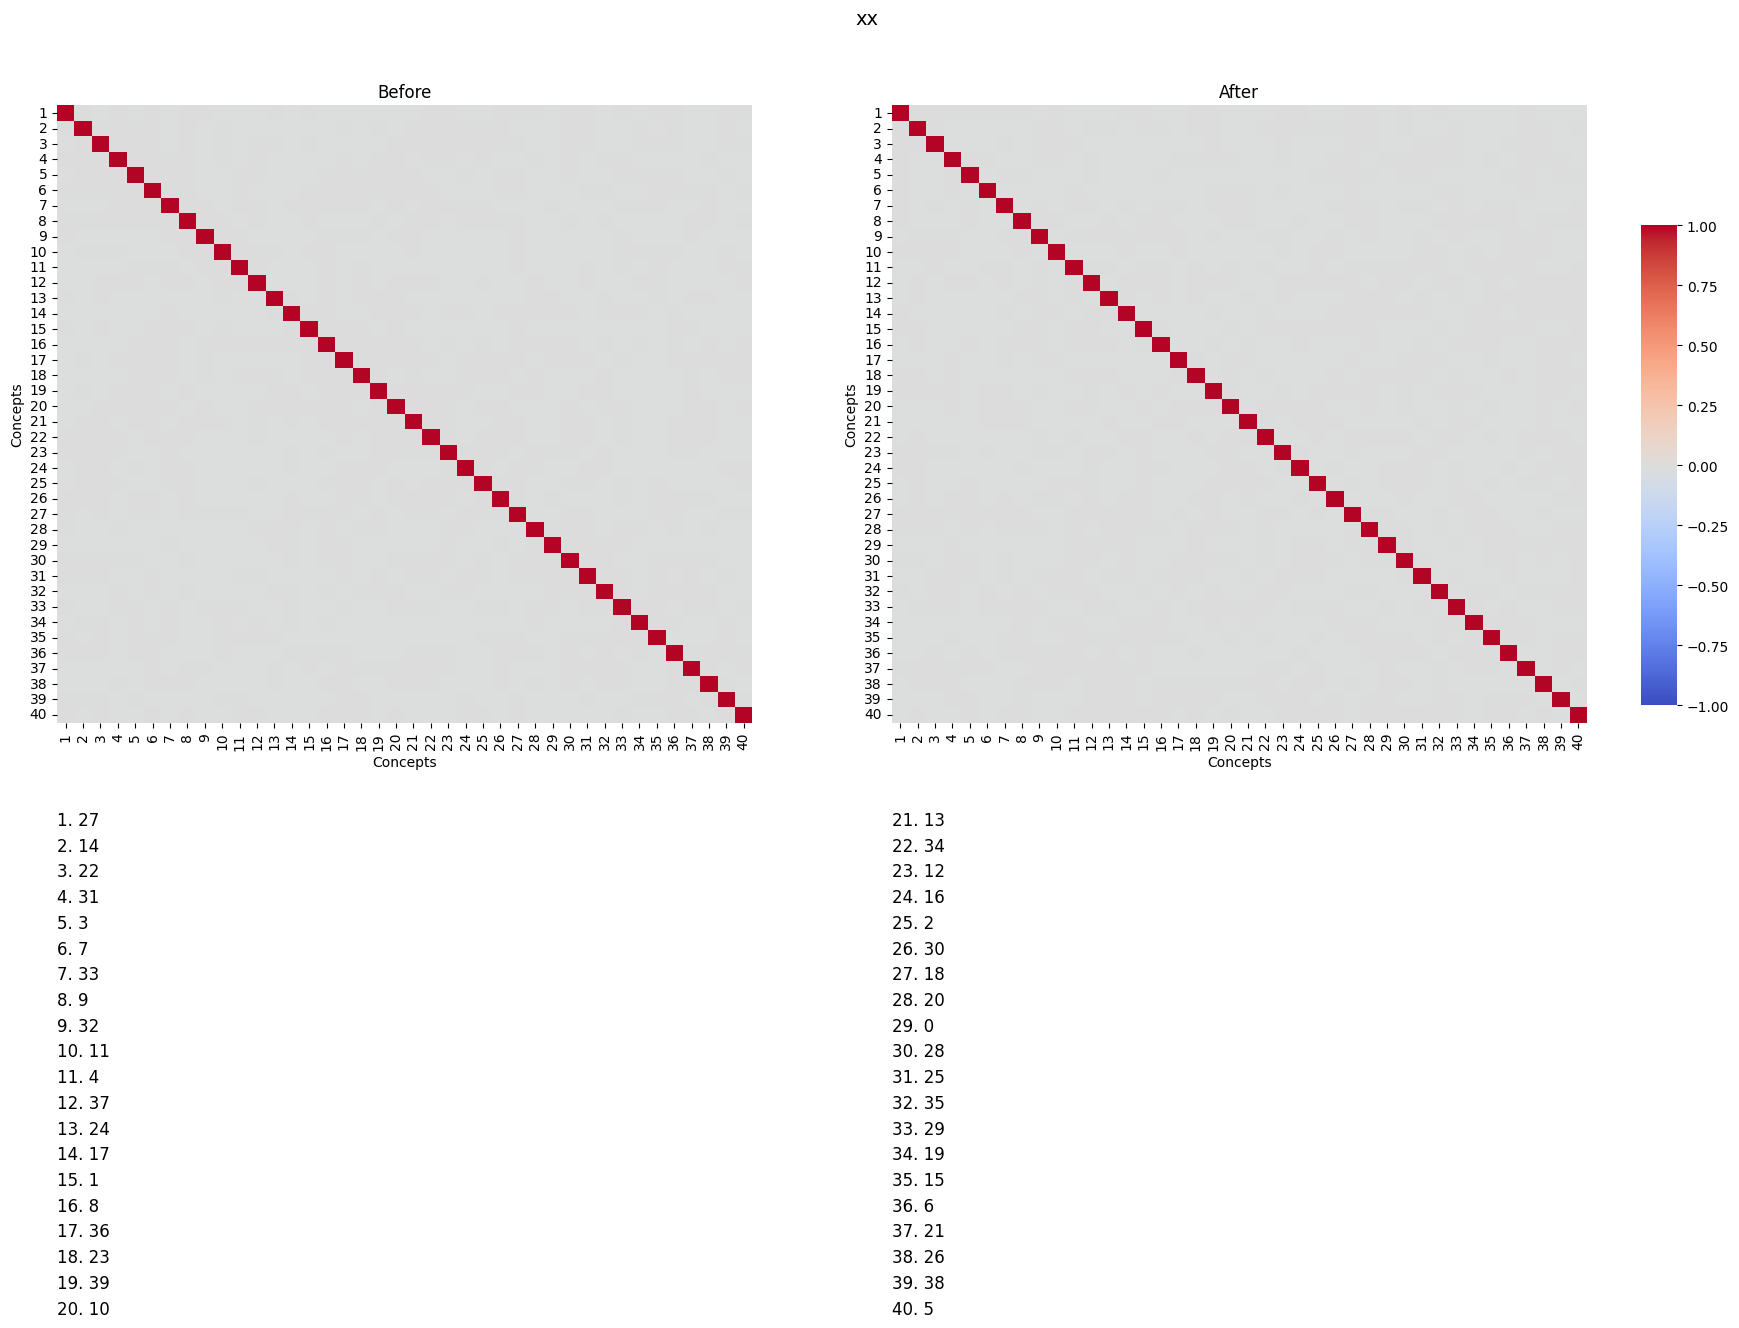

In [35]:
from utils.visualizations import visualize_before_after_sim_matrices

C1 = cavs1 @ cavs1.T
C2 = cavs2 @ cavs2.T
C3 = cavs3 @ cavs3.T
C4 = cavs4 @ cavs4.T
C5 = cavs5 @ cavs5.T

visualize_before_after_sim_matrices(C2.detach(), C5.detach(), labels=[str(i) for i in range(40)], title="xx")

In [19]:
from omegaconf import DictConfig, OmegaConf
from models import get_fn_model_loader

cfg_model = OmegaConf.load("/home/erogullari/Workspace/cav-disentanglement/configs/model/resnet18.yaml")
model = get_fn_model_loader(cfg_model.name)(pretrained=False, n_class = cfg_model.n_class)
state_dict = torch.load("/home/erogullari/Workspace/cav-disentanglement/checkpoints/checkpoint_resnet18_elements.pth")
model.load_state_dict(state_dict['model_state_dict'])

<All keys matched successfully>

In [ ]:
import inspect
import random
from pathlib import Path
from typing import Dict, Optional, Tuple
from omegaconf import DictConfig, OmegaConf
from torch.utils.data import DataLoader
import matplotlib.pyplot as plt
from hydra.utils import get_original_cwd
from datasets.elements import get_elements_dataset

cfg_dataset = OmegaConf.load("/home/erogullari/Workspace/cav-disentanglement/configs/dataset/elements.yaml")
cfg_dataset.num_samples = 2000

def _call_with_matching_kwargs(fn, kwargs: Dict) -> object:
    signature = inspect.signature(fn)
    if any(p.kind == inspect.Parameter.VAR_KEYWORD for p in signature.parameters.values()):
        return fn(**kwargs)
    allowed = {
        name
        for name, param in signature.parameters.items()
        if param.kind in (inspect.Parameter.POSITIONAL_OR_KEYWORD, inspect.Parameter.KEYWORD_ONLY)
    }
    filtered = {k: v for k, v in kwargs.items() if k in allowed}
    return fn(**filtered)

dataset = _call_with_matching_kwargs(get_elements_dataset, OmegaConf.to_container(cfg_dataset, resolve=True)) # type: ignore

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-1.0..1.0].


46-th class: {'color': 'cyan', 'shape': 'circle', 'texture': None}
59-th class: {'color': 'green', 'shape': 'triangle', 'texture': 'spots_polka'}
61-th class: {'color': 'green', 'shape': 'triangle', 'texture': None}
79-th class: {'color': None, 'shape': 'triangle', 'texture': 'spots_polka'}
139-th class: {'color': 'green', 'shape': None, 'texture': 'spots_polka'}


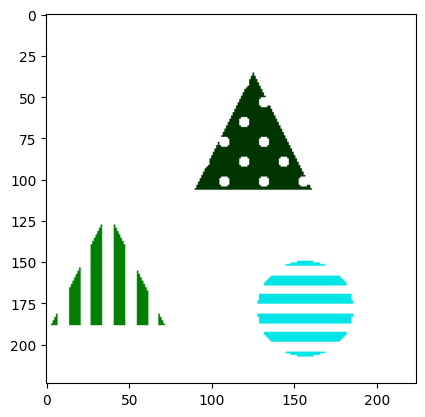

In [13]:
sample, target = dataset[0]
all_classes = cfg_dataset.class_configs
target_classes = [(i, all_classes[i]) for i, cls in enumerate(target) if cls == 1.0]
for i, cls in target_classes:
    print(f"{i}-th class: {cls}")

plt.imshow(sample.permute(1,2,0).numpy())

In [22]:
logits = model(sample.unsqueeze(0)).squeeze(0)
probs = torch.sigmoid(logits)
print(probs)
pred_cls = torch.where(probs > 0.5)
print(pred_cls)

tensor([0.4430, 0.4174, 0.4959, 0.4770, 0.4440, 0.4766, 0.4920, 0.4949, 0.5212,
        0.4719, 0.4455, 0.4781, 0.4747, 0.4905, 0.4649, 0.4677, 0.4822, 0.4281,
        0.4884, 0.4821, 0.4318, 0.4699, 0.4730, 0.4951, 0.4711, 0.4648, 0.4792,
        0.5043, 0.4714, 0.4427, 0.4992, 0.4650, 0.4663, 0.4805, 0.5092, 0.5232,
        0.4772, 0.4694, 0.5142, 0.4984, 0.5125, 0.4677, 0.5100, 0.4887, 0.5014,
        0.4829, 0.5228, 0.4763, 0.5033, 0.4707, 0.5024, 0.4971, 0.4890, 0.4858,
        0.5111, 0.4626, 0.5573, 0.5124, 0.5017, 0.4644, 0.5425, 0.5172, 0.4770,
        0.4911, 0.5188, 0.5193, 0.5246, 0.4657, 0.4686, 0.4959, 0.5122, 0.4801,
        0.4524, 0.4879, 0.4868, 0.4633, 0.5338, 0.4863, 0.5010, 0.4849, 0.5346,
        0.4765, 0.5257, 0.4907, 0.4935, 0.4621, 0.5133, 0.4981, 0.5083, 0.5066,
        0.4995, 0.4544, 0.5123, 0.4847, 0.4775, 0.4586, 0.4948, 0.4995, 0.4905,
        0.5159, 0.4979, 0.5217, 0.4743, 0.5342, 0.5057, 0.5063, 0.5137, 0.5121,
        0.5217, 0.5095, 0.4696, 0.4973, 

dict_keys(['model_state_dict'])